## 1.데이터 클리닝

- 데이터 로드

In [29]:
# 데이터 확인

import pandas as pd
import numpy as np


df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')


- 결측치 확인  
  - 결측치 제거


In [30]:
df_null0 = df.isnull().sum()

print('결측치 관측:\n--------------------\n',df_null0,'\n===========================================')

# 결측치 행 제거
df_dop_row = df.dropna(axis=0)

df_null1 = df_dop_row.isnull().sum()

print('결측치 관측:\n--------------------\n',df_null1,'\n===========================================')




# 결측치 제거 완료 
df0 = df_dop_row

df0

print('제거된 행의 갯수:',df.shape[0]-df0.shape[0])
print('제거된 행의 비율:',(df.shape[0]-df0.shape[0])/df.shape[0])
print('테이블 크기:',df0.shape)


결측치 관측:
--------------------
 Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64 
결측치 관측:
--------------------
 Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64 
제거된 행의 갯수: 357
제거된 행의 비율: 0.021508615495842872
테이블 크기: (16241, 10)


In [3]:


# 데이터 타입 확인
print('데이터 타입 확인:\n',df0.dtypes,'\n===========================================================')

# Sales 타입 세밀 검사

# 리스트 생략 제거 
np.set_printoptions(threshold=np.inf, linewidth=np.inf) #inf = infinity 

df0['EU_Sales'].values  

데이터 타입 확인:
 Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object 


array(['0', '0', '0', '0', '0.09', '0', '0.01', '0', '0', '0.03', '0.33M', '0.05', '0.02', '0', '0', '0.16', '0.02', '0', '0', '0.02', '0.45', '0.04', '0.02', '0.01', '0.53', '0.01', '0.02', '0.23', '0', '0.1', '0', '0.01', '0', '0.22', '0.2', '0.03M', '0.01', '0.01', '0.05', '0.2', '0.02', '0.05', '0', '0.33', '0.08', '0', '0.05', '0.02', '0.09', '0', '0', '0.26', '0', '0.07', '0.04', '0', '0.11', '0', '0.02', '0.17', '0.1', '0.04', '0', '0', '0.06', '0.01', '0.14', '0', '0.05', '0.01', '0.07', '0.06', '0.12', '0', '0', '0.24', '0', '0', '0.03', '0.07', '0', '0.05', '0.03', '0.13', '0', '0.02', '0.21', '0.15', '0.02', '0', '0.3', '0.04', '0.04', '0.02', '0', '0.16', '0.21', '0', '0', '0', '0', '0.02', '0', '0.02', '0.05', '0.07', '0', '0', '0.09', '0', '0', '0.03', '0.03', '0', '0', '0.01', '0', '0', '0.05', '2.38', '0.01', '0', '0.02', '0.55', '0.03', '0K', '0.01', '0.02', '1.12', '0.01', '0', '0.43', '0.1', '0', '0.13', '50K', '0.14', '0.06', '0', '0.03', '0.07', '0.13', '0.02', '0.

In [4]:

# 생략 제거
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)




# 결측치 포함 행 반환 

null_data = df[df.isnull().any(axis=1)]


# 연도 결측치 0 치환
# null_data['Year'] = null_data['Year'].fillna(0)

null_data.head()


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01


- 무결측 데이터로 피쳐 엔지니어링 진행?
  - 작업을 위해 데이터 분활
  - 연도 데이터
  - 플렛폼, 장르, 퍼블리셔 데이터
  - 판매량 데이터

In [5]:
# 1
df0_year = df0[['Name','Year']]
# 2
df0_PGP = df0[['Name','Platform','Genre','Publisher']]
# 3
df0_sales = df0[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]



  - 연도 데이터 정리

In [6]:

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)




# 연도 확인
df0_year['Year'].value_counts()

# 불일치하는 년도 확인 및 정리

def year_clean(a):
  '''
  a는 int 또는 float만 가능합니다.
  '''

  if 100 > a:
    if a >= 50:
      a += 1900
    else :
      a += 2000
  return a

df0_year['Year'] = df0_year['Year'].apply(year_clean)

# 확인
df0_year.head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Year
0,Candace Kane's Candy Factory,2008.0
1,The Munchables,2009.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010.0
3,Deal or No Deal: Special Edition,2010.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010.0
5,Power Pro Kun Pocket 8,2005.0
6,JASF: Jane's Advanced Strike Fighters,2011.0
7,Samurai Warriors: State of War,2005.0
8,Imabikisou,2007.0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,2011.0


- 플렛폼, 장르, 퍼블리셔 데이터

In [7]:
df0_PGP = df0[['Name','Platform','Genre','Publisher']]

print(df0_PGP['Platform'].unique())


print(df0_PGP['Genre'].unique())
# = ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
# 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']

print(df0_PGP['Publisher'].unique())
# 너무 많고 다양해 무의미해 보인다. 그래도 일단 리스트로 만들어보자.

['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS' '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing' 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']
['Destineer' 'Namco Bandai Games' 'Alchemist' 'Zoo Games' 'D3Publisher' 'Konami Digital Entertainment' 'Deep Silver' 'Tecmo Koei' 'Sega' 'THQ' 'Empire Interactive' 'Ubisoft' 'Paradox Interactive' '505 Games' 'Tomy Corporation' 'Eidos Interactive' 'Microsoft Game Studios' 'Nippon Ichi Software' 'Kalypso Media' 'Electronic Arts' 'Sony Computer Entertainment' 'Activision' 'Tru Blu Entertainment' 'Warner Bros. Interactive Entertainment' 'Midway Games' 'Mindscape' 'Wargaming.net' 'Capcom' 'Acclaim Entertainment' 'Unknown' 'Nintendo' 'Disney Interactive Studios' 'Crave Entertainment' 'Sunflowers' 'Arc System Works' 'Milestone S.r.l' 'Kamui' 'Hudson Soft' 'Square Enix' 'Focus Home Inte

- 판매량 데이터

In [ ]:
from operator import concat

# 판매량 정리
df0_sales = df0[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

# 데이터 정리
df0_name = df0[['Name']]

df0_sales1 = df0_sales.drop('Name',axis=1)

# asdf = df0_sales1['NA_Sales'][df0_sales1['NA_Sales'].str.contains('K')]

  # 정리에 필요한 함수 만들기

def clean_s(s):
  '''
  대문자로 정리한뒤 끝자리에대하여 문자를 확인한뒤 상수화하여 계산후 리턴
  '''
  s = s.upper()
  if s[-1] == 'K':
    s = float(s.replace('K',''))*1000
  elif s[-1] == 'M':
    s = float(s.replace('M',''))*1000000
  else:
    s = float(s)*1000000
  
  return s


df0_sales1 = df0_sales1.applymap(clean_s)

df0_sales = pd.concat((df0_name,df0_sales1),axis=1)
# 판매량 정리 완료
df0_sales.head()


- 분할 정리한 데이터 다시 합치기

In [9]:

# 1
df0_year
# 2
df0_PGP
# 3
df0_sales

df0_PGP_0 = df0_PGP[['Platform','Genre','Publisher']]
df0_sales_0 = df0_sales[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

# 분활 클리닝 데이터 합체
df_clean = pd.concat([df0_year,df0_PGP_0],axis=1)
df_clean = pd.concat([df_clean,df0_sales_0],axis=1)
df_clean['Year'] = df_clean['Year'].astype(int)
# 완료

df_clean['all_sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']


print(df_clean.head(30))

                                                 Name  Year Platform  \
0                        Candace Kane's Candy Factory  2008       DS   
1                                      The Munchables  2009      Wii   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  2010      PSP   
3                    Deal or No Deal: Special Edition  2010       DS   
4           Ben 10 Ultimate Alien: Cosmic Destruction  2010      PS3   
5                              Power Pro Kun Pocket 8  2005       DS   
6               JASF: Jane's Advanced Strike Fighters  2011       PC   
7                      Samurai Warriors: State of War  2005      PSP   
8                                          Imabikisou  2007      PS3   
9   The Penguins of Madagascar: Dr. Blowhole Retur...  2011      PS3   
10                                        Ford Racing  2001       PS   
11         Harvest Moon: More Friends of Mineral Town  2003      GBA   
12                                      Mount & Blade  2008     

In [10]:
# 1
df00_year = df_clean[['Name','Year']]
# 2
df00_PGP = df_clean[['Name','Platform','Genre','Publisher']]
# 3
df00_sales = df_clean[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [11]:
# 연도 재확인

df00_year = df_clean['Year'].value_counts()



# 연도 확인 및 정리 완료

year_cnt = df0_year['Year'].value_counts()

year_cnt = year_cnt.sort_index(ascending=False)


print(year_cnt.head())
print(df0_year.head())

2020.0      1
2017.0      3
2016.0    342
2015.0    611
2014.0    580
Name: Year, dtype: int64
                                             Name    Year
0                    Candace Kane's Candy Factory  2008.0
1                                  The Munchables  2009.0
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  2010.0
3                Deal or No Deal: Special Edition  2010.0
4       Ben 10 Ultimate Alien: Cosmic Destruction  2010.0


In [12]:

# 연도별 출시된 게임 갯수 리스트
year_cnt = df_clean['Year'].value_counts()

year_cnt = year_cnt.sort_index()
# 리스트 생성

print(year_cnt.head(20))

1980      8
1981     46
1982     36
1983     17
1984     14
1985     14
1986     21
1987     16
1988     15
1989     17
1990     16
1991     41
1992     43
1993     60
1994    121
1995    219
1996    262
1997    289
1998    377
1999    336
Name: Year, dtype: int64


In [13]:

# 게임 장르 갯수 리스트
genre_cnt = df_clean['Genre'].value_counts()

# 리스트 생성

print(genre_cnt)



Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64


In [14]:

# 플랫폼 갯수 리스트
pf_cnt = df_clean['Platform'].value_counts()
# 리스트 생성

print(pf_cnt)


DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In [ ]:

# 플랫폼 갯수 리스트
pbl_cnt = df_clean['Publisher'].value_counts()
# 리스트 생성

print(pbl_cnt)
print(pbl_cnt.head(50))
print(pbl_cnt.head(100))





In [ ]:
from pandas._libs.hashtable import value_count

df00_sales = df_clean[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

df00_sales = df00_sales.set_index('Name')
df00_sales.head()
df00_sales_s = df00_sales.sum()
df00_sales_s = df00_sales_s.sort_values(ascending=False)

df00_sales['all_sales'] = df00_sales['NA_Sales'] + df00_sales['EU_Sales'] + df00_sales['JP_Sales'] + df00_sales['Other_Sales']

df00_sales_s.head()



df00_sales.head()

In [ ]:

print(df_clean.head())
print(df_clean.shape)

# def cl_year_sales(a)







In [18]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf



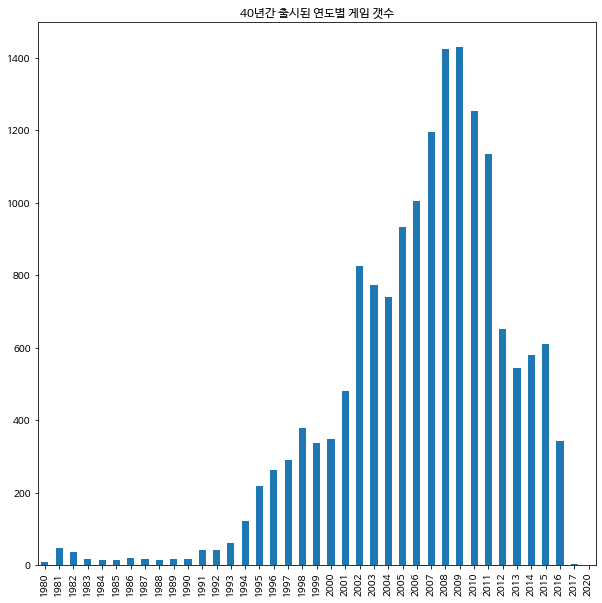

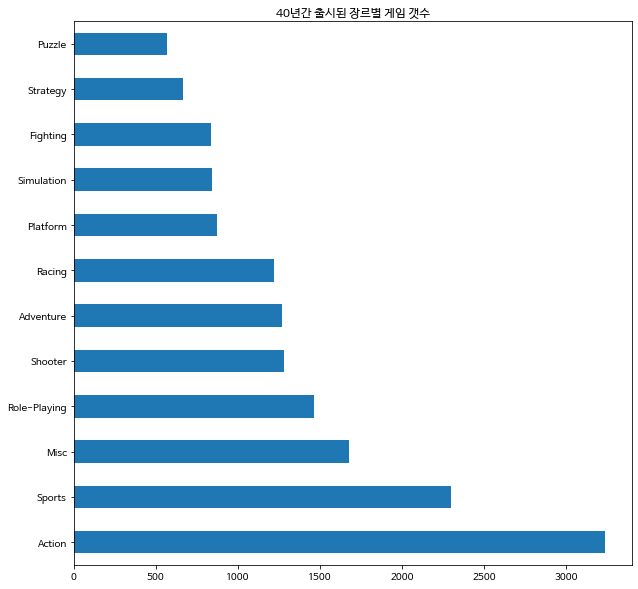

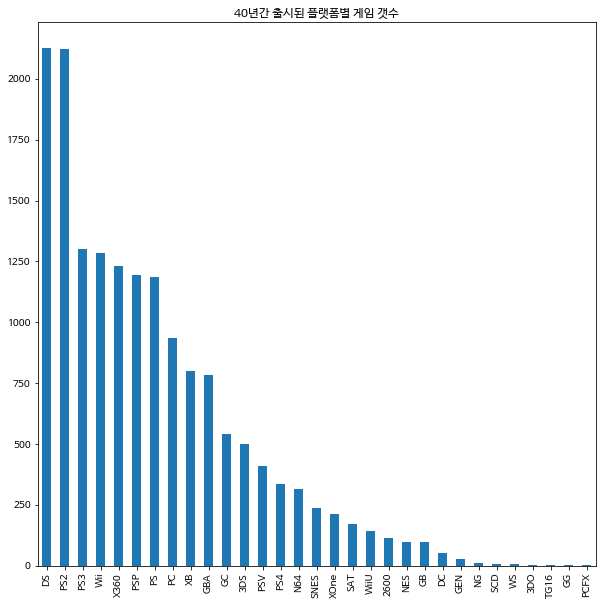

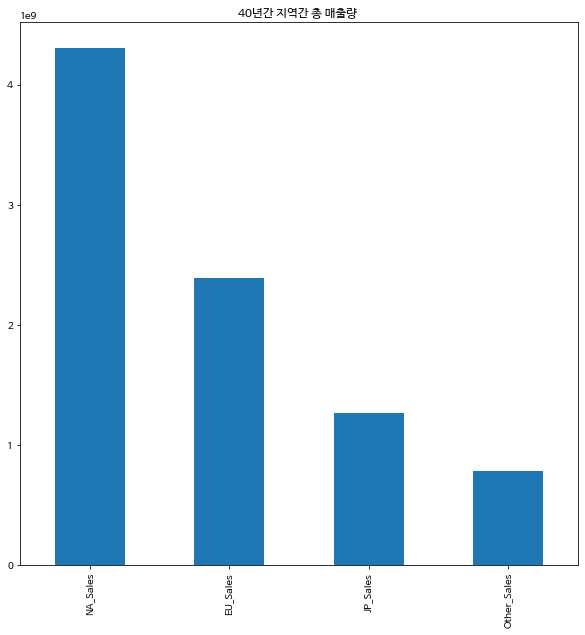

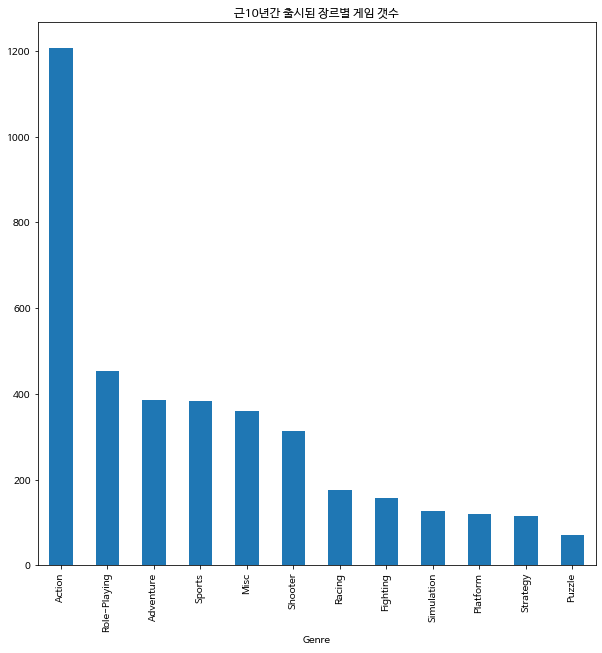

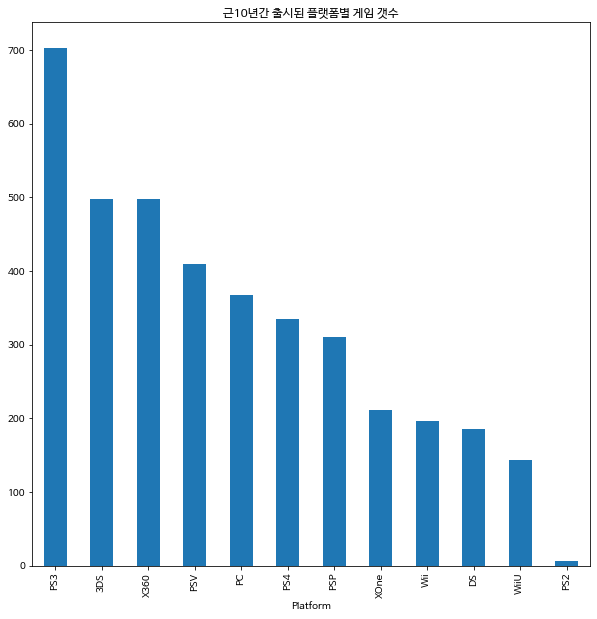

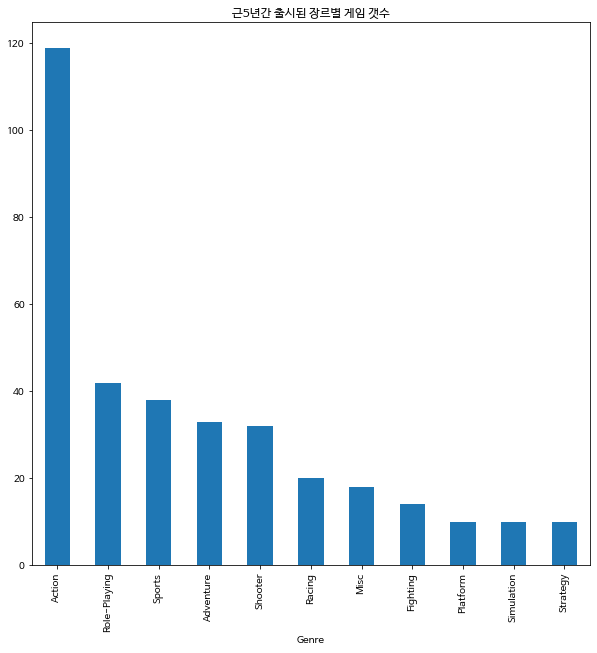

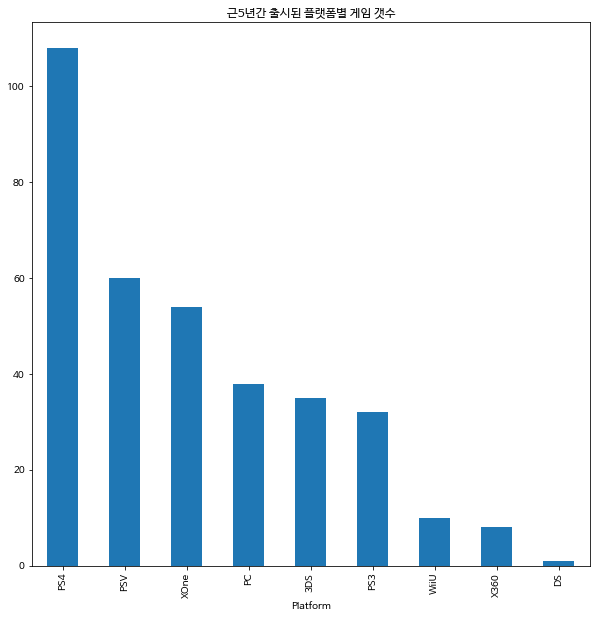

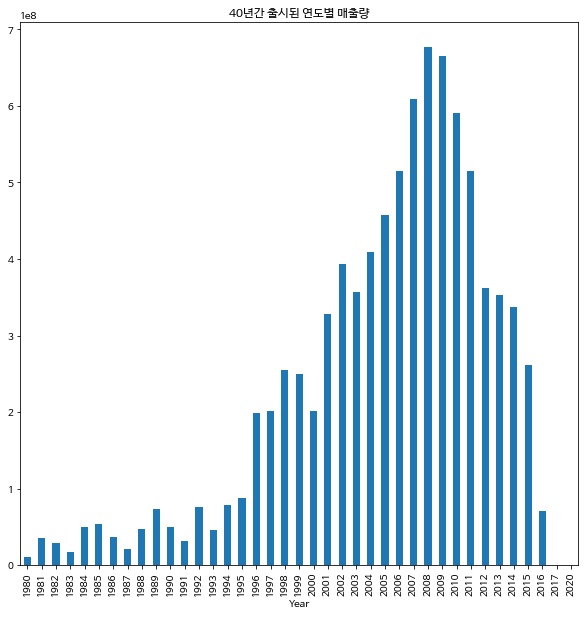

Genre
Action          1208
Role-Playing     453
Adventure        385
Sports           384
Misc             361
Shooter          314
Racing           176
Fighting         156
Simulation       127
Platform         119
Strategy         114
Puzzle            70
dtype: int64 


 Platform
PS3     703
3DS     498
X360    498
PSV     409
PC      368
PS4     335
PSP     311
XOne    212
Wii     197
DS      186
WiiU    143
PS2       7
dtype: int64


In [22]:
import matplotlib.pyplot as plt


# 한글깨짐 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 그래프 크기 조절
plt.rcParams['figure.figsize'] = [10, 10]


# 연도별 게임 생산량
year_cnt.plot(kind='bar')
plt.title('40년간 출시된 연도별 게임 갯수')
plt.show()

# 장르별 게임 총 갯수 
genre_cnt.plot(kind='barh')
plt.title('40년간 출시된 장르별 게임 갯수')
plt.show()

# 플랫폼별 게임 총 갯수
pf_cnt.plot(kind='bar')
plt.title('40년간 출시된 플랫폼별 게임 갯수')
plt.show()

# 게임 매출량
df00_sales_s.plot(kind='bar')
plt.title('40년간 지역간 총 매출량 ')

plt.show()



'''
플랫폼별 판매량
장르별 판매량

장르별 40년과 10년간의 비교
티테스트 두 군집간의 유의미한 관계가 있는지 확인

플랫폼별 40년과 10년간의 비교
티테스트 두 군집간의 유의미한 관계가 있는지 확인

연도별 게임 매출량 대략적 라인그리기
2009년을 기준으로 상승장이였다가 하강함.


년도별 매출량 

'''




# 근 10년간의 게임 판매 정보
dfc_y10y = df_clean[df_clean['Year'] >= 2011]

# 근 5년간의 게임 판매 정보
dfc_y5y = df_clean[df_clean['Year'] >= 2016]

# 근10년
dfc_y10y_g = dfc_y10y.value_counts('Genre')
dfc_y10y_pf = dfc_y10y.value_counts('Platform')
# 근5년
dfc_y5y_g = dfc_y5y.value_counts('Genre')
dfc_y5y_pf = dfc_y5y.value_counts('Platform')

# 장르별 게임 총 갯수
dfc_y10y_g.plot(kind='bar')
plt.title('근10년간 출시된 장르별 게임 갯수')
plt.show()

# 플랫폼별 게임 총 갯수
dfc_y10y_pf.plot(kind='bar')
plt.title('근10년간 출시된 플랫폼별 게임 갯수')
plt.show()

# 장르별 게임 총 갯수
dfc_y5y_g.plot(kind='bar')
plt.title('근5년간 출시된 장르별 게임 갯수')
plt.show()

# 플랫폼별 게임 총 갯수
dfc_y5y_pf.plot(kind='bar')
plt.title('근5년간 출시된 플랫폼별 게임 갯수')
plt.show()



# 연도에 대하여 판매량 합계
dfc_year = df_clean['all_sales'].groupby(df_clean['Year']).sum()

# 플랫폼별 게임 총 갯수
dfc_year.plot(kind='bar')
plt.title('40년간 출시된 연도별 매출량')
plt.show()







print(dfc_y10y_g,'\n\n\n',dfc_y10y_pf)

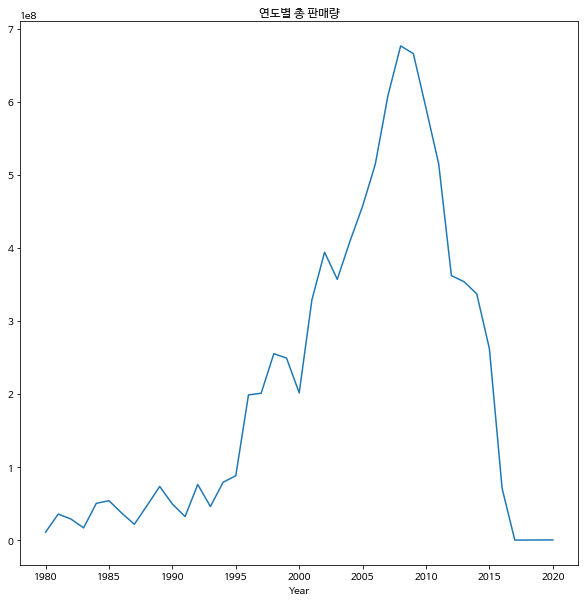

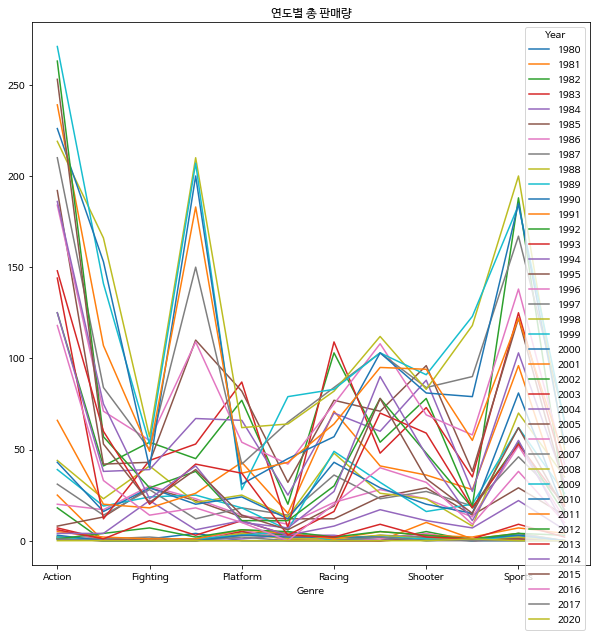

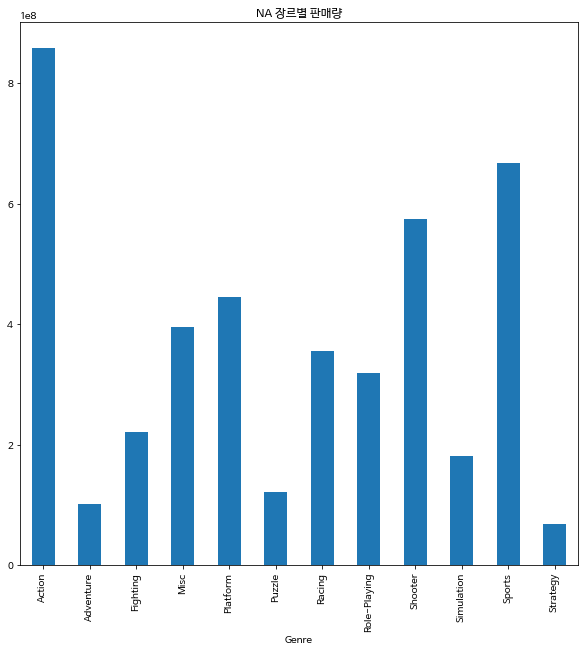

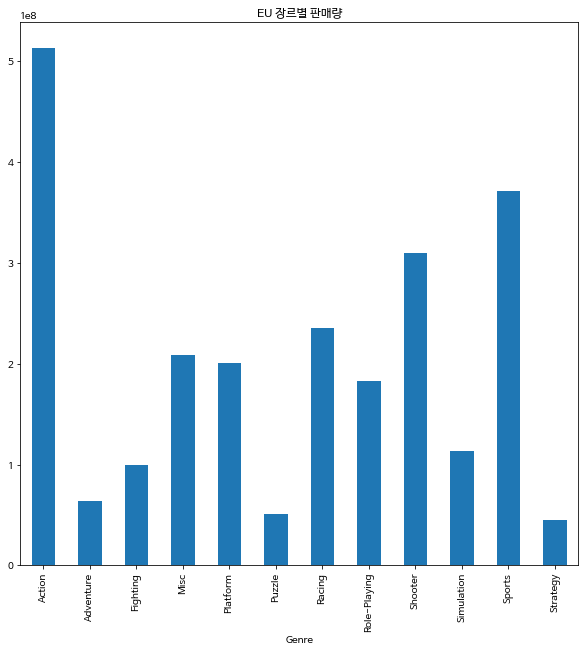

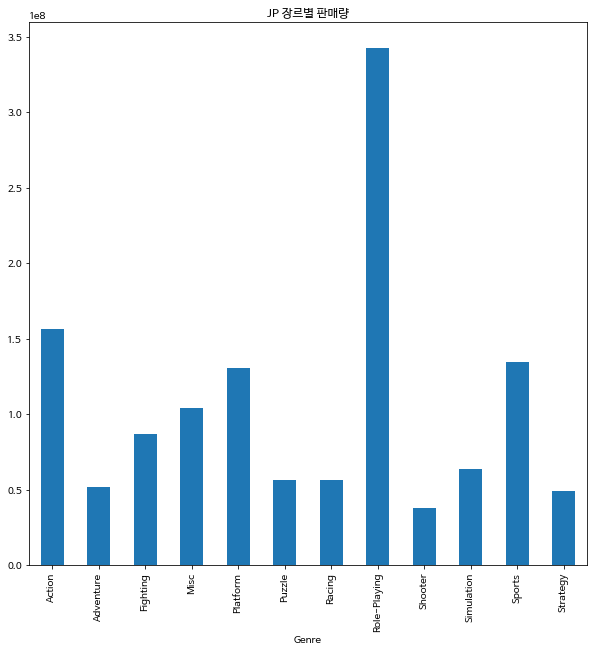

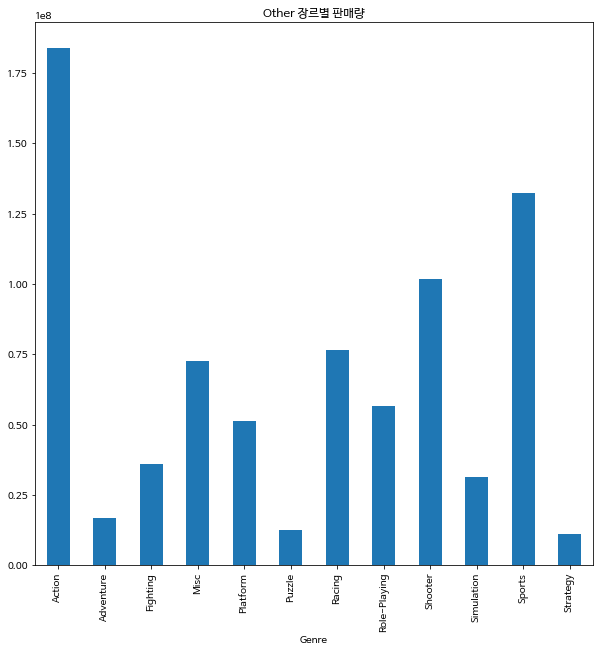

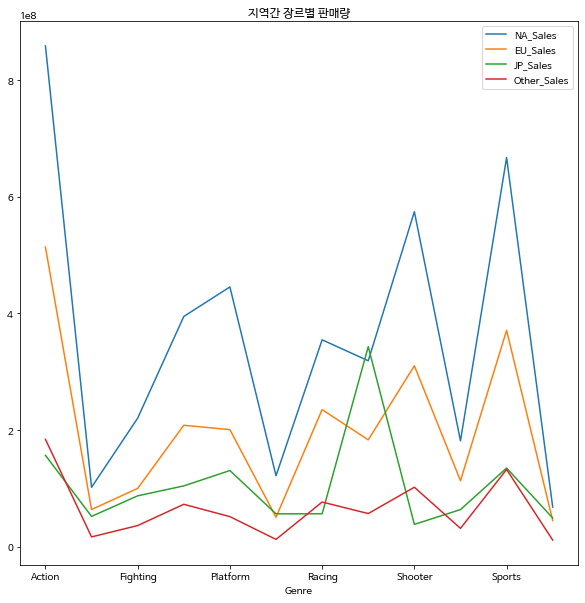

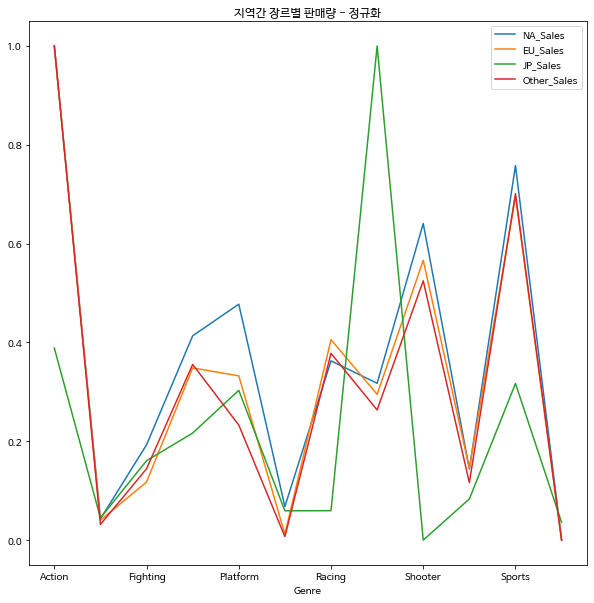

In [35]:


# 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

# 여러분이 생각하는 문제 (혹은 풀었으면 좋겠는 문제) 제시
# 그 문제에 대한 가설 및 사용한 데이터셋에 대한 설명
# 작업 결과 및 결론


# 근 10년간의 게임 판매 정보
# dfc_y10y = df_clean[df_clean['Year'] >= 2011]

# 근 5년간의 게임 판매 정보
# dfc_y5y = df_clean[df_clean['Year'] >= 2016]


dfc_year = df_clean['all_sales'].groupby(df_clean['Year']).sum()

# 총 판매량을 연도로 묶어라
dfc_year.plot()
plt.title('연도별 총 판매량')
plt.show()


dfc_G_Y = df_clean['Year'].groupby(df_clean['Genre']).value_counts()

dfc_G_Y = pd.DataFrame(dfc_G_Y)
dfc_G_Y = dfc_G_Y.rename(columns={'Year':'cnt'})
dfc_G_Y_g = dfc_G_Y.reset_index()
dfc_G_Y_pv = dfc_G_Y_g.pivot('Genre','Year','cnt')
dfc_G_Y_pv = dfc_G_Y_pv.fillna(0)



# 장르게임을 연도로 묶어라

  # 그래프 크기(설정상) 
# plt.figure(figsize=(10,10))

  # 판다스상 시각적 그래프 크기
plt.rcParams['figure.figsize'] = [10, 10]
dfc_G_Y_pv.plot()
plt.title('연도별 총 판매량')
plt.show()

# dfc_G_Y_pv_5y = dfc_G_Y_pv[[1980,1985,1990,1995,2000,2005,2010,2015,2020]]
# # dfc_G_Y_pv_5y = pd.DataFram()

# dfc_G_Y_pv_5y['1980~'] = dfc_G_Y_pv[1980]+dfc_G_Y_pv[1981]+dfc_G_Y_pv[1982]+dfc_G_Y_pv[1983]+dfc_G_Y_pv[1984]
# dfc_G_Y_pv_5y['1985~'] = dfc_G_Y_pv[1985]+dfc_G_Y_pv[1986]+dfc_G_Y_pv[1987]+dfc_G_Y_pv[1988]+dfc_G_Y_pv[1989]


# normalization_dfc_G_Y_pv_5y = (dfc_G_Y_pv_5y - dfc_G_Y_pv_5y.mean())/dfc_G_Y_pv_5y.std()





# # GYcnt
# normalization_dfc_G_Y_pv_5y.plot()[0]
# plt.title('5년단위 연도별 장르게임 겟수')
# plt.show()


# 지역에 따라서 선호하는 게임 장르가 다를까?

dfc_gna = df_clean['NA_Sales'].groupby(df_clean['Genre']).sum()
dfc_geu = df_clean['EU_Sales'].groupby(df_clean['Genre']).sum()
dfc_gjp = df_clean['JP_Sales'].groupby(df_clean['Genre']).sum()
dfc_go = df_clean['Other_Sales'].groupby(df_clean['Genre']).sum()

# NA_Sales	EU_Sales	JP_Sales	Other_Sales

# NA
dfc_gna.plot(kind='bar')
plt.title('NA 장르별 판매량')
plt.show()
# EU
dfc_geu.plot(kind='bar')
plt.title('EU 장르별 판매량')
plt.show()
# JP
dfc_gjp.plot(kind='bar')
plt.title('JP 장르별 판매량')
plt.show()
# Other
dfc_go.plot(kind='bar')
plt.title('Other 장르별 판매량')
plt.show()

# # kind='bar'

dfc_allg = pd.concat([dfc_gna,dfc_geu,dfc_gjp,dfc_go],axis=1)


def minmax_norm(df):
  return (df-df.min())/(df.max()-df.min())

dfc_allg_minmax_norm = minmax_norm(dfc_allg)



# # all
dfc_allg.plot()
plt.title('지역간 장르별 판매량')
plt.show()

# # minmax all
dfc_allg_minmax_norm.plot()
plt.title('지역간 장르별 판매량 - 정규화')
plt.show()

